In [ ]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

from cycler import cycler
import matplotlib.cm as cm

# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)

%matplotlib widget

In [2]:
Tl_ion_15bar = pd.read_hdf("../config/NextTon_Tl_gammatable_0.h5", "MC/E")
Tl_ion_15bar_events = len(Tl_ion_15bar.event_id.unique())

# These scale factors  correct for reconstruction efficiency, divide by total generated and multiply by mass of copper

MCu = [65384.54852258, 22563.22807345, 14302.84599257, 10957.27914774, 7837.01088115]


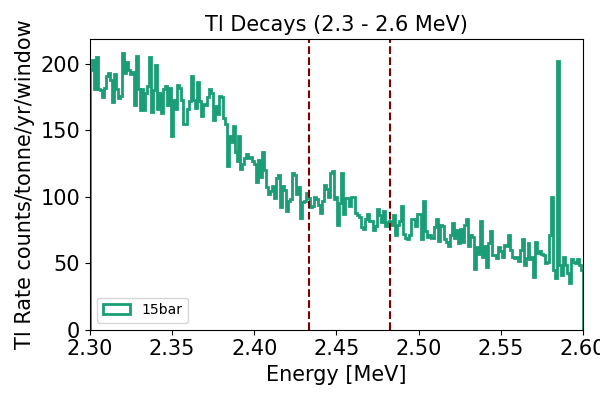

In [9]:
plt.figure(figsize=(6,4))

# 6.012e-4 is the bin width in MeV

# plt.subplot(1, 2, 1)  # row, col,index 
# # plt.hist(Bi_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar.energy) * sf_Bi_25bar*6.012e-4, label = "25bar");
# plt.hist(Bi_ion_15bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar.energy) * sf_Bi_15bar*6.012e-4, label = "15bar");
# plt.hist(Bi_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar.energy) * sf_Bi_10bar*6.012e-4, label = "10bar");
# plt.hist(Bi_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar.energy) * sf_Bi_5bar*6.012e-4, label = "5bar");
# plt.hist(Bi_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar.energy) * sf_Bi_1bar*6.012e-4, label = "1bar");

# plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
# plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
# plt.xlabel("Energy [MeV]", fontsize=15)
# plt.tick_params(axis='both', which='both', labelsize=15)
# plt.legend()
# plt.semilogy()
# plt.tight_layout()

# plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
# plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")
# plt.xlim(2.3,2.6)


# plt.subplot(1, 2, 2)  # row, col,index
# plt.hist(Tl_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar.energy) * sf_Tl_25bar*6.012e-4, label = "25bar");
plt.hist(Tl_ion_15bar.energy, bins = np.linspace(2.3,2.6,250), histtype="step", linewidth=2, label = "15bar");
# plt.hist(Tl_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar.energy) * sf_Tl_10bar*6.012e-4, label = "10bar");
# plt.hist(Tl_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar.energy) * sf_Tl_5bar*6.012e-4, label = "5bar");
# plt.hist(Tl_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar.energy) * sf_Tl_1bar*6.012e-4, label = "1bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
# plt.semilogy()
plt.tight_layout()
plt.xlim(2.3,2.6)

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")

plt.savefig(f"plots/Technote/BiTlEnergySpectrum.pdf")